# BANGLADESH NATIONAL CRICKET TEAM

# PROJECT OBJECTIVE
To analyze and visualize the performance of Bangladesh National Cricket Team since 2000. According to BUSINESS STANDARD, a trusted news portal, Bangladesh Cricket Board(BCB) is the fifth richest board in the world. Moreover, the country itself reserves huge budget for BCB. It would, therefore, be very interesting to look into the performance of the most popular team under BCB.


# Data Source
Majority of the data have been collected from ESPNcricinfo. Some data were also collected from Wikipedia and official website of International Cricket Board (ICC).
 1) ESPNcricinfo: https://stats.espncricinfo.com/ci/engine/records/index.html?id=25;type=team
 
 2) Wikipedia: https://en.wikipedia.org/wiki/Bangladesh_national_cricket_team
 
 3) ICC: https://www.icc-cricket.com/teams/men/22/bangladesh/overview
 
 4) Business Standard: https://www.tbsnews.net/sports/bcb-fifth-richest-board-world-then-why-domestic-cricket-languishing-309406
 

# Steps
1) Collection of data from the aforementioned sources and storing them in appropriate format

2) Arranging the data according to Date and Year

3) Determining the success indicators besides Win/Loss

4) Caluculating the success indicators: The success indicators are Net Run Rate (NRR), Net Run Rate (NRR) differences and the progress in ICC World Cups. After calculation, they were stored in new and separate columns.

5) Determining the appropriate graphs to convey the stories.

6) Coding for the appropriate graphs

In [2]:
import pandas as pd      #importing pandas


In [3]:
data = pd.read_csv("BD.csv")
data.head()

Year  Test Ranking  ODI Ranking  T-20 Ranking
0  2021             9            7             8

#### Bangladesh Team's Ranking: 
The above table shows the rankings of the Bangladesh Cricket Team in three different match types in 2021.

### Two Team Series
The first data-set will contain information regarding series between two teams, that is Bangladesh vs Any Other Team.

In [4]:
data = pd.read_csv("bdtwo.csv") #importing data-set from .csv file

In [5]:
data.head()  # to show the first five rows of the data-set

Series Name     Winner   Season   NRR
0    Pakistan in Bangladesh ODI Match   Pakistan  1999/03 -2.38
1   Pakistan in Bangladesh ODI Series   Pakistan  2000/01 -1.30
2   Bangladesh in Zimbabwe ODI Series   Zimbabwe  2001/04 -0.81
3   Zimbabwe in Bangladesh ODI Series   Zimbabwe  2001/11 -0.62
4  Bangladesh in Sri Lanka ODI Series  Sri Lanka  2002/08 -1.70

In [6]:
import altair as alt #importing altair

data = pd.read_csv("bdtwo.csv")   #reading the .csv file with the data-set in it 


#making the graph using altair
alt.Chart(data).mark_bar().encode(
    x="Season:T",
    y="NRR:Q",
    color=alt.condition(
        alt.datum.NRR > 0,
        alt.value("green"),  # The color for WIN
        alt.value("orange")  # The color for LOSS
    )
).properties(width=900)

alt.Chart(...)

It can be seen from the graph that in majority of the matches, Bangladesh lost the match and there are more matches with larger losses than matches with larger wins. The team started to win such type of matches after year 2004.

### Multiple Team Series
The second data-set contains results from Bangladesh's participation in series against more than one opponents.

In [7]:
data = pd.read_csv("bdmu.csv")   #importing data-set from .csv file

In [8]:
data.head()     #to show the first five rows of the data-set

Series Name Result   Season  BD NRR  \
0  Asia Cup (Bangladesh, India, Pakistan, Sri Lan...   Lose  2000/06  -2.800   
1                ICC Champions Trophy (in Sri Lanka)   Lose  2002/09  -3.275   
2  TVS Cup (Bangladesh) (Bangladesh, India, South...   Lose  2003/04  -2.078   
3  Asia Cup (Bangladesh, Hong Kong, India, Pakist...   Lose  2004/08   0.400   
4                  ICC Champions Trophy (in England)   Lose  2004/09  -3.111   

   Winner NRR  
0       1.866  
1       2.861  
2       1.930  
3       1.280  
4       1.476

Next, the data from the 'Result' column in the above data-set is extracted and put in a new list. The percentages of Win,Lose and Shared in the Series are calculated and stored in a new .csv file.

In [10]:
data = pd.read_csv("bdmu.csv")

#converting the column named "Result" to a list for easy comparison with strings
from pandas import *

Results = data['Result'].tolist()

count_lose = 0     #initializing the required counters
count_win = 0
count_shared = 0

for i in range(len(Results)):               #setting up a loop to go through the list
    if Results[i] == "Lose":
        count_lose = count_lose + 1
    elif Results[i] == "Win":
        count_win = count_win + 1
    else:
        count_shared = count_shared + 1
        
percent_lose = (count_lose/len(Results))*100             #calculating percentages of lose, win and shared in the Multi-team series
percent_win = (count_win/len(Results))*100
percent_shared = 100-(percent_lose + percent_win)

print("Lose=", percent_lose,"%", "Win=", round(percent_win,1),"%","Shared=", round(percent_shared,1),"%")





Lose= 87.5 % Win= 8.3 % Shared= 4.2 %


Now lets create a graph to display the data.

In [11]:
import plotly.graph_objects as go  #importing another graphing library

x_array = ["Results of Multi-team Series"]   

fig = go.Figure(data=[
    go.Bar(name='Shared', x=x_array, y=[percent_shared]),    #coding for the graph
    go.Bar(name='Lose', x=x_array, y=[percent_lose]),
    go.Bar(name='Win', x=x_array, y=[percent_win])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()
fig.write_html("file.html")


Please visit this link, Download the the file and view the graph from your computer:

https://drive.google.com/file/d/1oAjhw7mom8vjIO_iQd50VEW9NoZXXzma/view?usp=sharing

GRAPH:

Now, let's compare the Net Run Rates(NRR) of Bangladesh team and the Winning team in the series Bangladesh lost.

In [12]:
data = pd.read_csv("nrrcomp.csv")      #importing the data-set with the arranged NRRs in them

import plotly.express as px   #importing plotly

df = data
fig = px.line(df, x='Season', y='NRR', color='Team')           #coding for the graph
fig.show()
fig.write_html("file1.html")



Please visit this link, Download the the file and view the graph from your computer: 

https://drive.google.com/file/d/1CTPyFBMhiqerigizj1LL8pm6-tH_xQ-o/view?usp=sharing

It can be seen that the NRRs of Bangladesh team and the Winning team used to differ a lot in the earlier matches. However, the difference started to decrease as years went by. The latest performace, though, wasn't satisfactory.

### Test Series

The third data-set contains records of Bangladesh playing Test Cricket Series with all the other teams holding test position at present.

In [13]:
data = pd.read_csv("Bantest.csv")  #imporing the third data-set
data.head(12)        #showing the data-set

Opponent  Matches   Win%   Loss%  Draw%
0    Afghanistan        1   0.00  100.00   0.00
1      Australia        6  16.66   83.33   0.00
2        England       10  10.00   90.00   0.00
3          India       11   0.00   81.81  18.18
4    New Zealand       15   0.00   80.00  20.00
5       Pakistan       11   0.00   90.90   9.09
6   South Africa       12   0.00   83.33  16.66
7      Sri Lanka       20   5.00   80.00  15.00
8    West Indies       16  25.00   62.50  12.50
9       Zimbabwe       17  41.17   41.17  17.64
10         Total      119  11.76   74.78  13.44

In [14]:
data = pd.read_csv("Bantest.csv")               

import plotly.express as px      
df = data

fig = px.scatter(df, x="Loss%", y="Win%",
	         size="Matches", color="Opponent",
                 hover_name="Opponent", log_x=True, size_max=60)
fig.show()
fig.write_html("file2.html")                                            #coding to make the graphs

fig = px.scatter(df, x="Loss%", y="Draw%",
	         size="Matches", color="Opponent",
                 hover_name="Opponent", log_x=True, size_max=60)
fig.show()
fig.write_html("file3.html")

Please visit this link, Download the the file and view the graph from your computer:

https://drive.google.com/file/d/1X5xnjBDWu8Jfmvs73Y2yjUy68YnwXBQo/view?usp=sharing

https://drive.google.com/file/d/1uqxAl4XKsmUtoMmmt17jJ_1aI5MvB4EK/view?usp=sharing

It can be seen from the graphs that Bangladesh did not have much Wins in Test Cricket. The team also has opponents with whom they never won any test matches. 

### ICC World Cup and ICC T20 World Cup

The fourth data-set consists of Bangladesh's performances in two of the biggest tournaments in cricket.These tournaments occur periodically and are a great indicator of how each team is doing compared to all other A-list teams.

#### ICC World Cups:

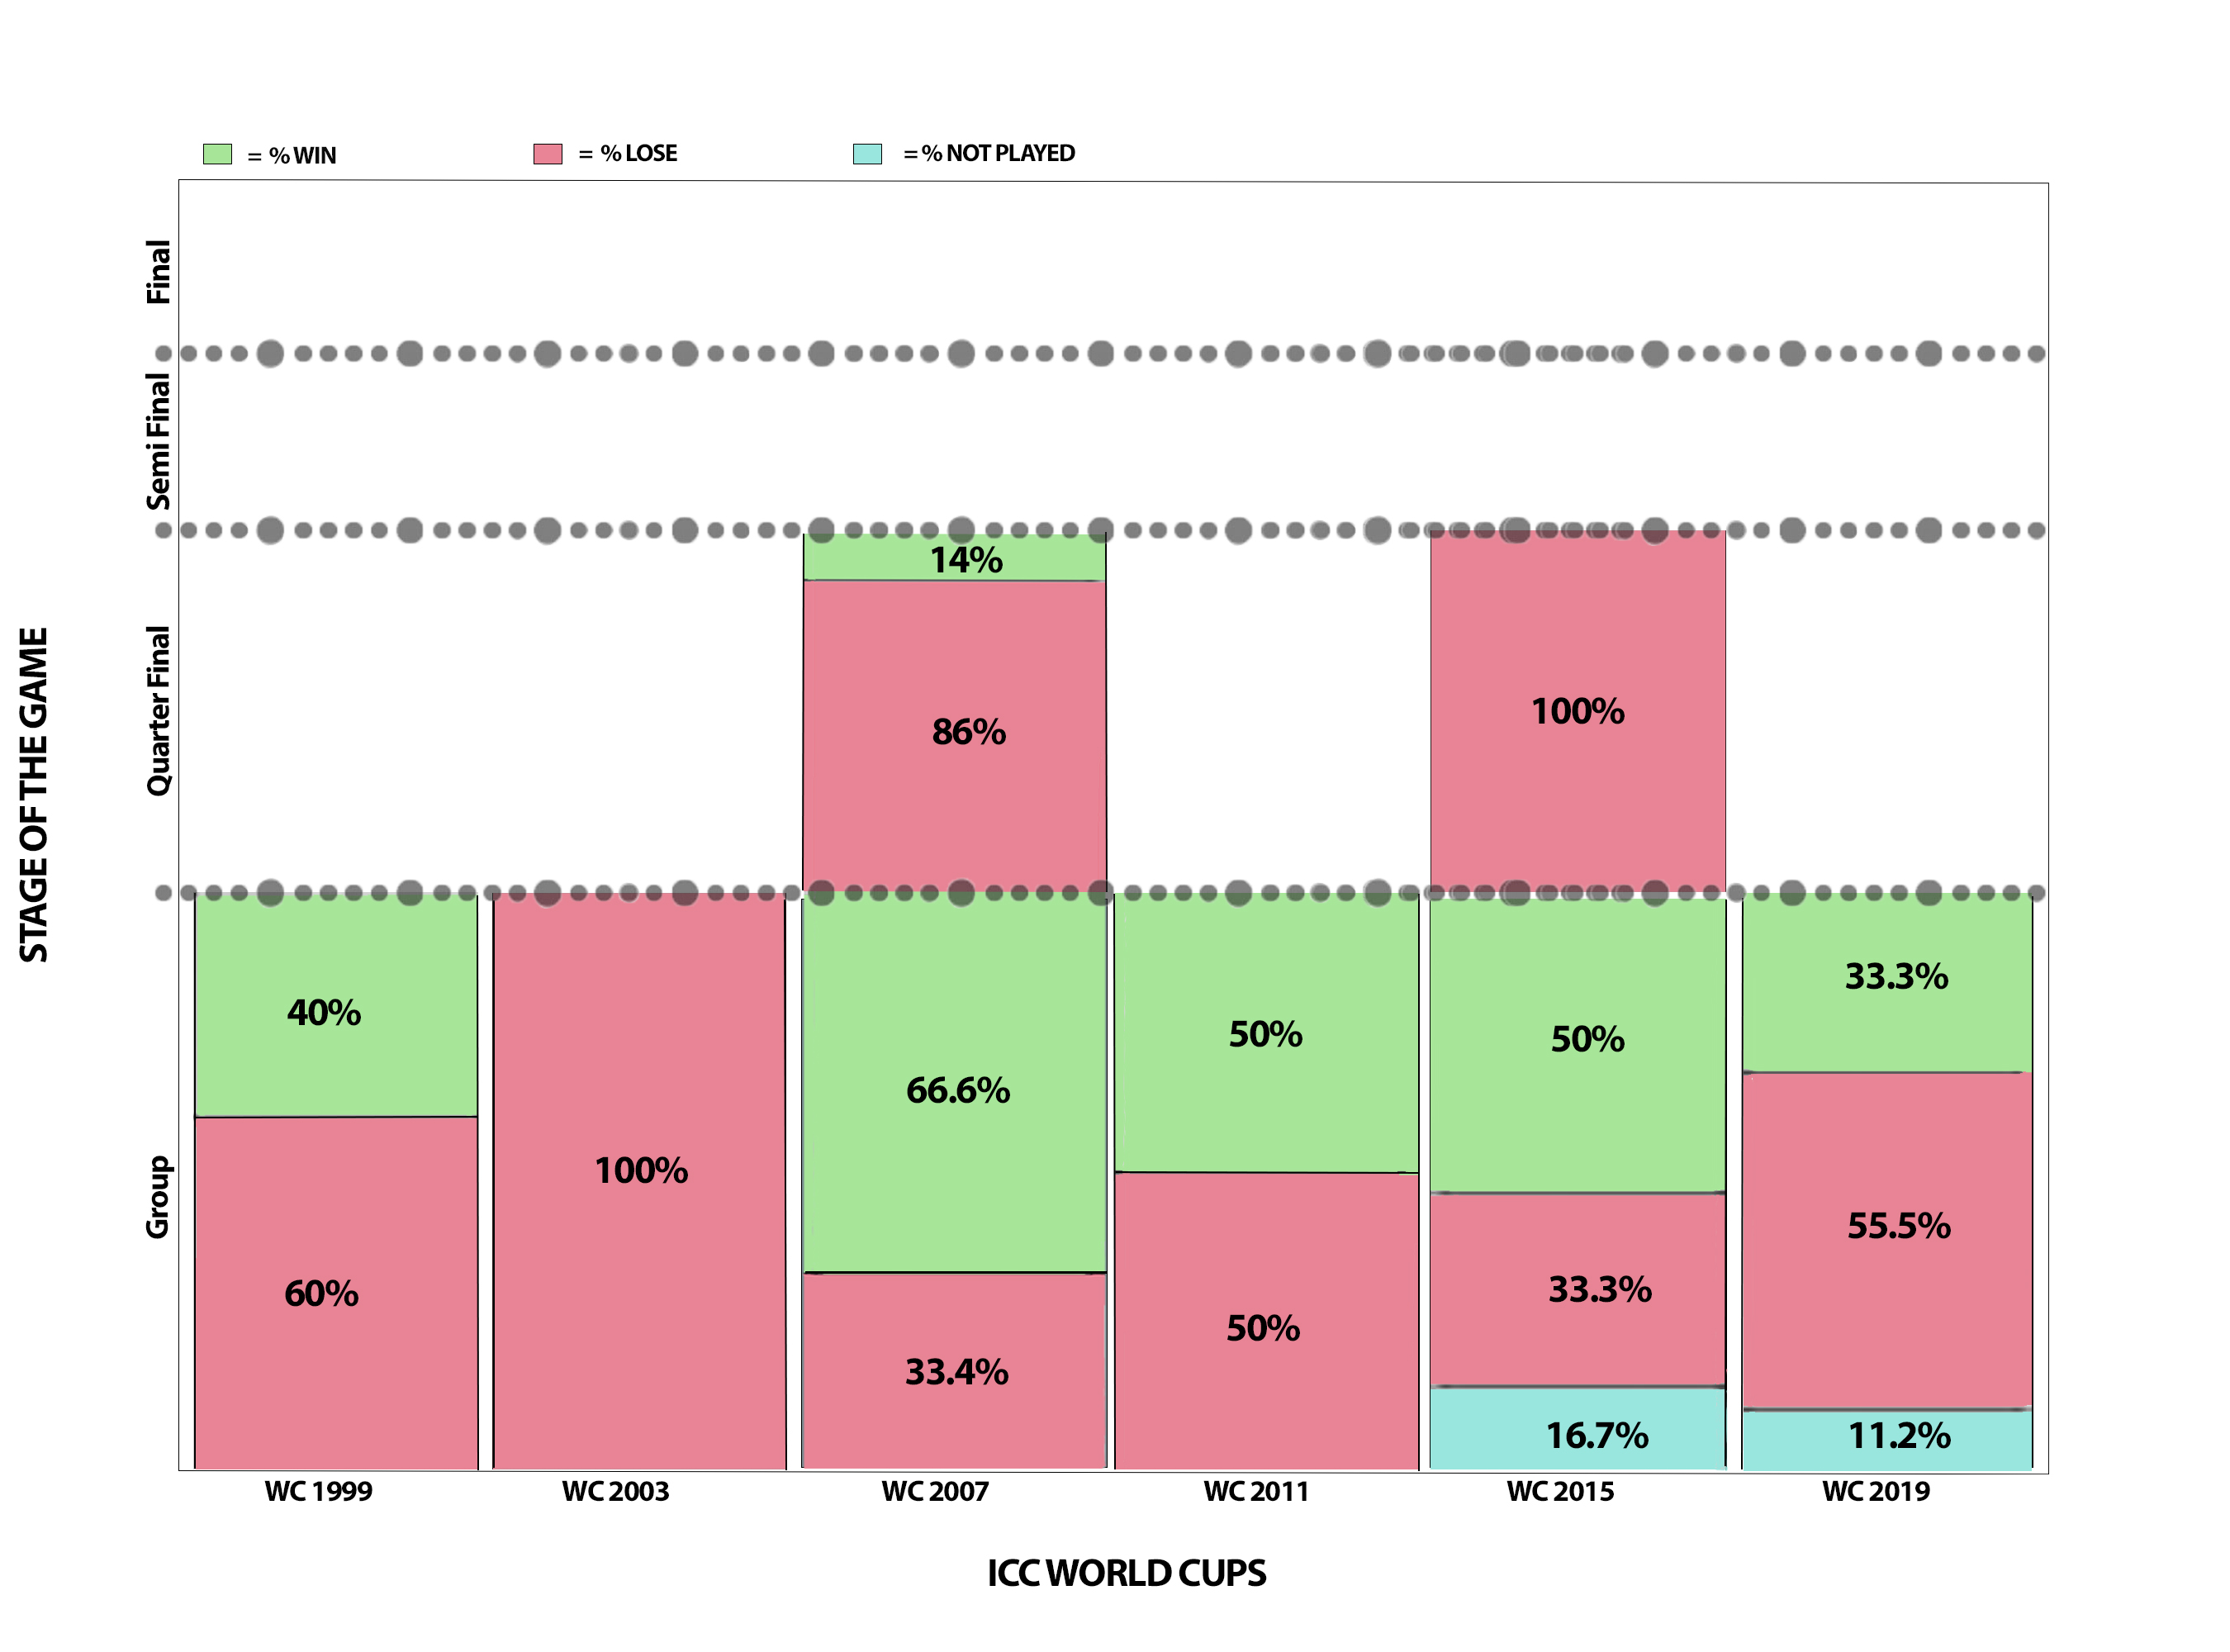

The team has to go a long way to progress to Semi-finals and Finals of one of the biggest cricket tournament, ICC World Cup. 

#### ICC T20 World Cups:

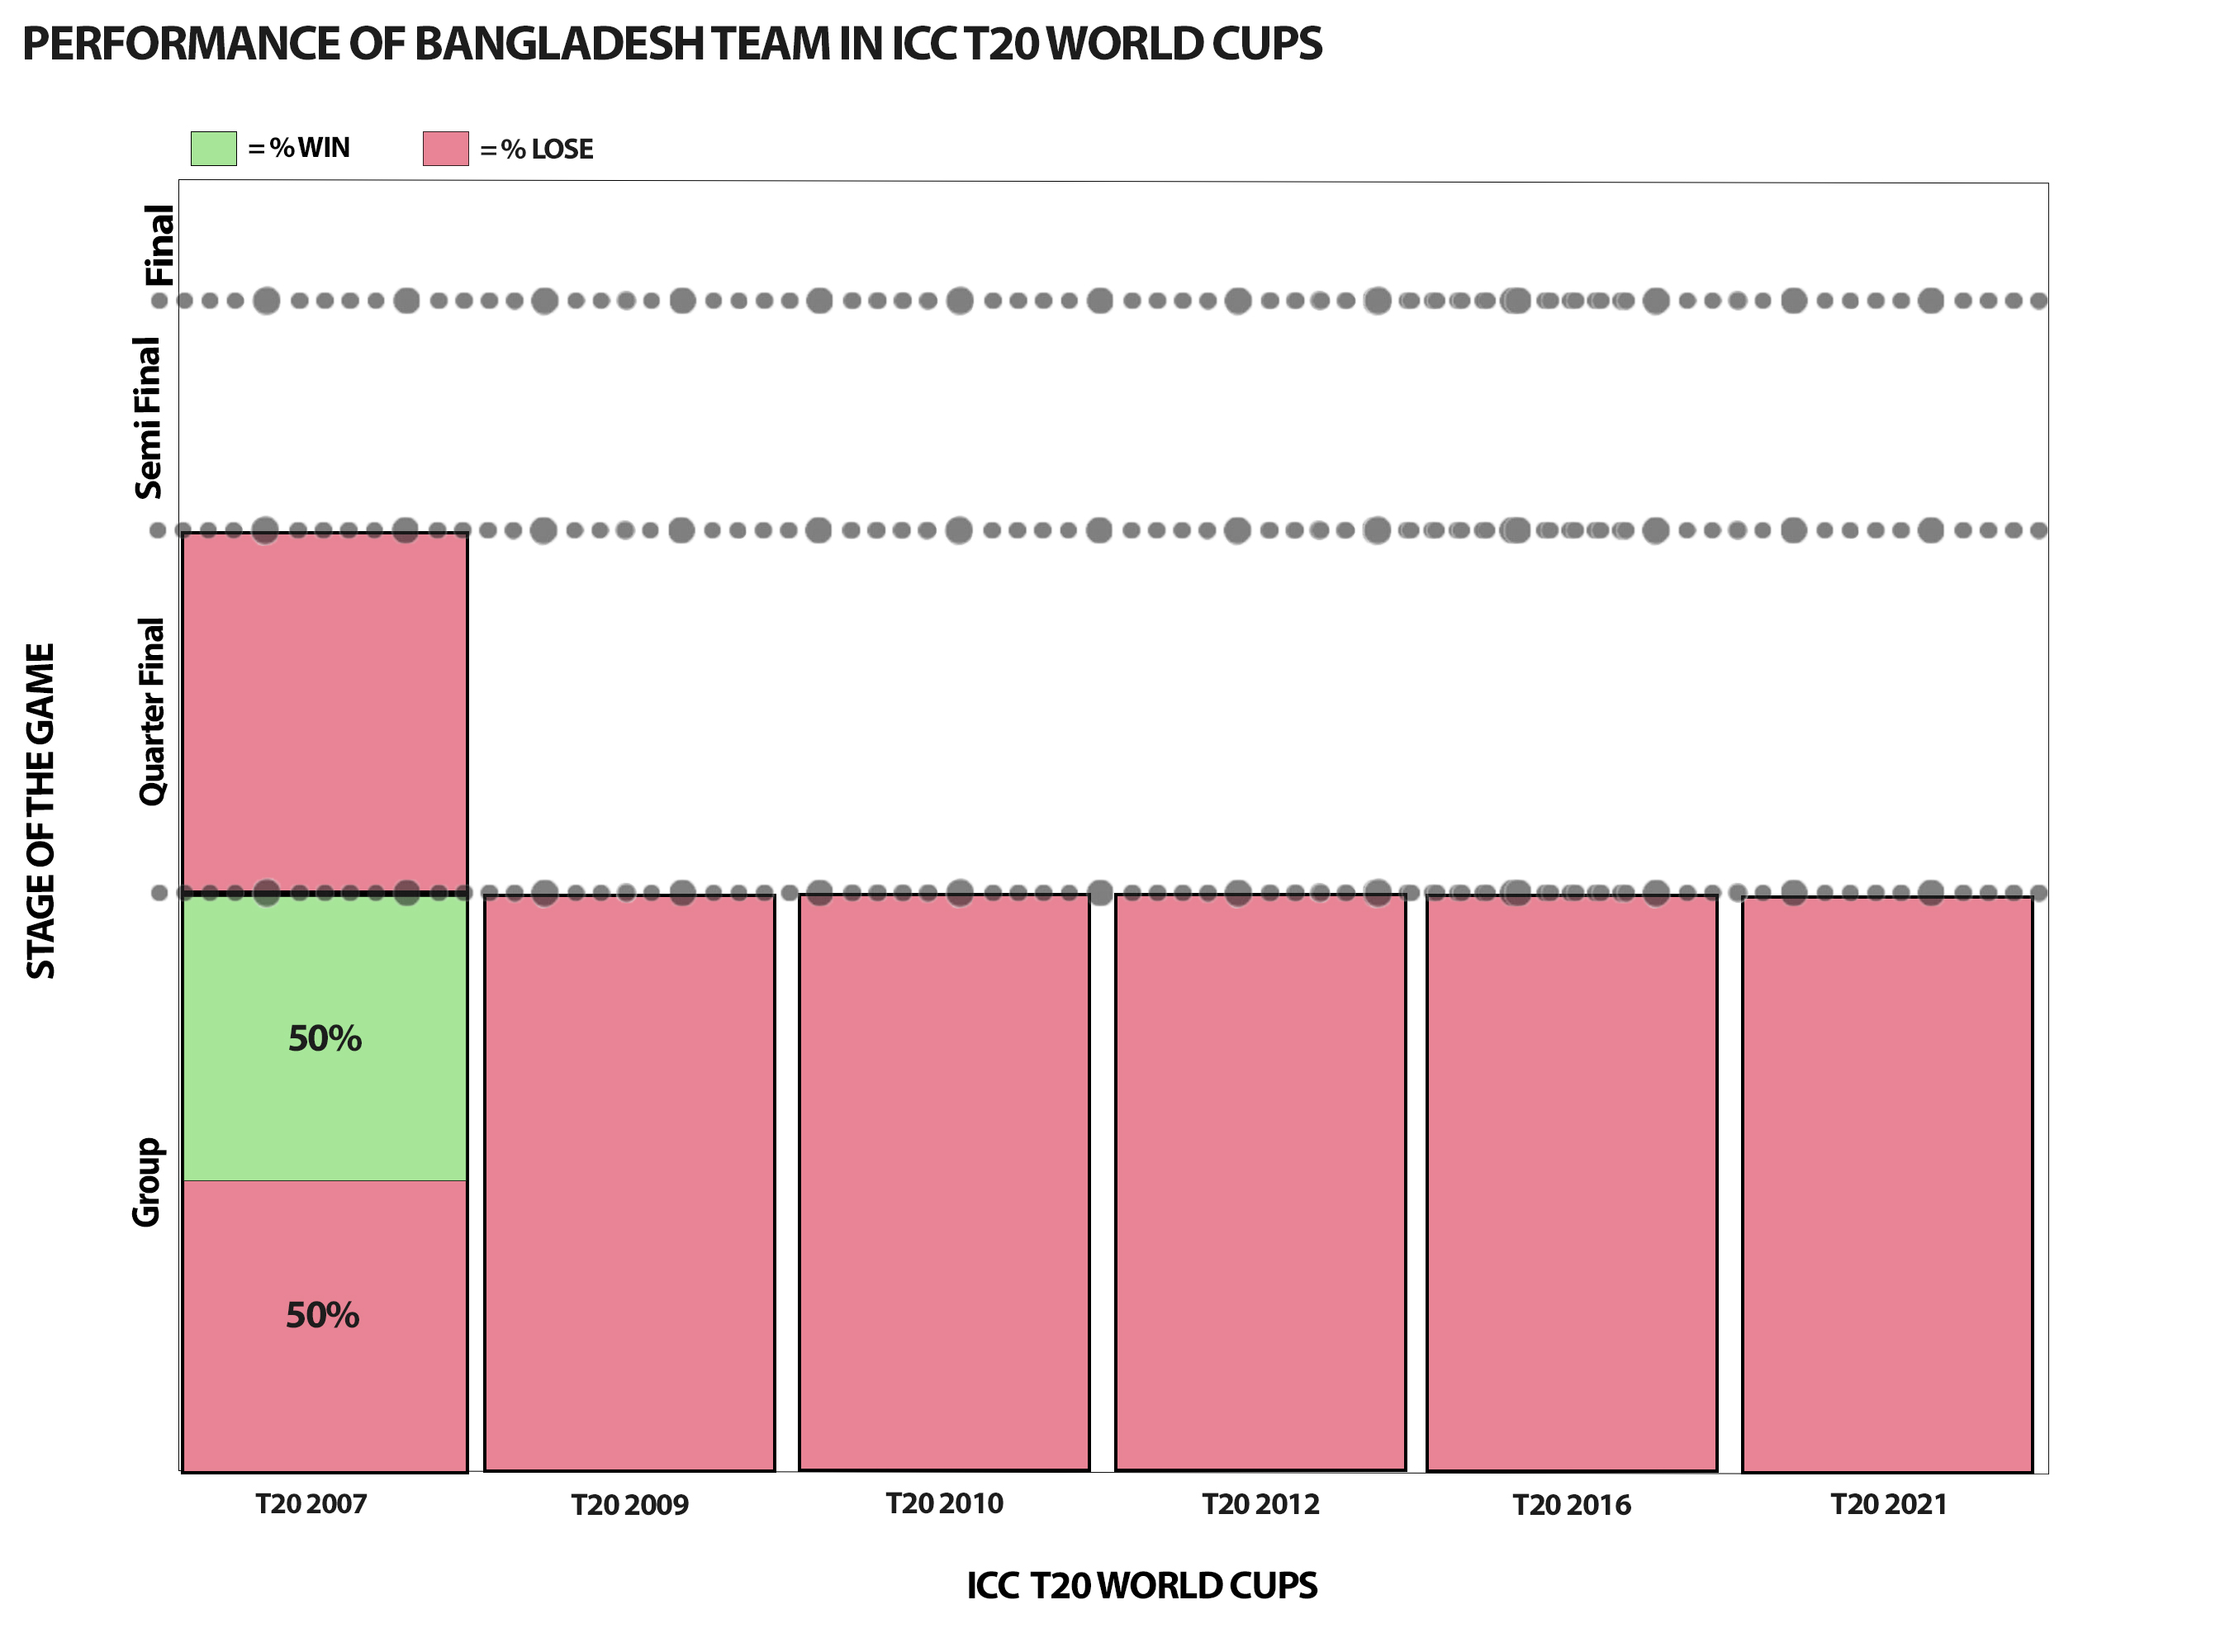

The team does very poorly in ICC T20 World Cups and even other T20 matches in general.

## Conclusion

Since 2000, Bangladesh Cricket Team has seen improvements in general matches because they started to win matches and their Net Run Rate difference with the other teams started to decrease. However, the improvements weren't strong enough to pull them up through the stages of ICC World Cups and ICC T20 World Cups. 
Moreover, the team needs to improve a lot more in test cricket matches.
